<a href="https://colab.research.google.com/github/pitaconsumer/Capstone-5/blob/master/Capstone_5_Unsupervised_Learning__Twitter_Build_A_Sentiment_Analysis_Topic_Modeling_thurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Sentiment Analysis of Tweets 
## Background
Since Iran’s Foreign Minister tweeted that Iran was providing medical aid to Lebanon, PITAPOLICY conducted a twitter sentiment analysis of Iran’s Foreign Minister Javed Zarif in the midst of Lebanon’s tragic, non-nuclear explosion to review official leaders’ responses on social media regarding aid to Lebanon. Below are sample results of his 200 most recent tweets. Although mostly positive or neutral with respect to the Beirut Explosion in expressing humanitarian solidarity, the negative tweets reference discussion on deteriorating relations with the U.S. and hopes for reinitiating the Joint Comprehensive Plan of Action, JCPOA, regarding Iran’s previous nonproliferation agreement. In 2016, Donald Tr ump’s administration removed the U.S. from this peaceful measure towards nuclear containment. 

## Goal: Use Clustering Techniques to Review Sentiment of Tweets
Work to tune a variety of models before choosing what you consider to be the best performer.

## Research Question: How can @PITAPOLICY use Latent Semantic Analysis and clustering techniques to segment a controversial political figure's tweets to understand where he is most polarizing?

## Methodology: 

#### 1
Clean tweets to review sentiment.
#### 2
Use vocabulary based on Textblob library, which includes its own biases, to measure 'polarity', 'subjectivity', 'posivity', 'negativity', and 'neutral'. 

#### 3
We could use a LSA used to compare how similar the tweets are to one another in the dataset since that is unlabeled. 

#### 4
Split tweets into training and test data sets to see how similar his tweets are to another--we are looking for content consistency. 

#### 5
We could  use Word2Vec and plot using t-SNE cluster on out Twitter dataset to determine which phrases appear the most frequently in tweets to compare with whether they have been retweeted or flagged.

## Summary of Results:
We see that Javed Zarif has 1584269 followers.

As mentioned earlier, this Twitter account’s sample (@Jzarif) of 200 tweets reflects mostly positive tweets as shown. (http://www.pitapolicy.com/twitter-sentiment-analysis-of-iranian-foreign-minister-javed-zarif/) We again see it in the more recent graph shown in green representing mostly positive tweets during crisis. Approximately 75 percent of the tweets are positive, thus 25 percent are neutral.

We measured both ‘subjectivity’ and ‘polarity’ and see that Javed’s tweets concentrate between -0.2 and .4 on the ‘polarity’ and skew positively.

These were the top 10 hashtags and themes trending in Washington, DC at that time:
* Biden 
* Lebanon 
* Hiroshima 
* #BB22
* #FOURTHCOUNTDOWN 
* The NRA 
* Pence 
* Lakers 
* Letitia James 
* Independence Day

After completing TFIDF, we constructed an LSA model to identify semantic analysis. We see that there's little difference between the train and test sets of LSA samples. As such, PITAPOLICY concludes that the Twitter user is consistent about his messages. 

Regarding more unsupervised techniques, like clustering: we employed 'K-means', 'DBSAN', and 'T-SNE'. T-SNE ploted more clustered topics than K-Means. DBSCAN cluster showed the least promising results.

In future, we will use TFIDF to compare topic modeling results using Latent Dirichlect Allocation and Non-negative Matrix Formation (NNMF).

In [2]:
!pip install farsi-tools

     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26307 sha256=983b9727e34710af37a22aa458d24efc348292f5ed4d37127b6a6f9484a3d377
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing


## Getting the Data 

In [4]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = "YOUR_KEY_HERE"
    #consumer_secret = "YOUR_SECRET_HERE"

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [3]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

import json
import pickle
import farsi_tools 

In [6]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Thanks to @SecPompeo, we now know criteria for a country to be removed from—or included in—State Dept's terror list: 

Relations with Israel.

World's No.1 nuclear threat, rights violator, illegal occupier &amp; terror entity

How can the world STILL take US foreign policy seriously? https://t.co/TR4NVWdKCy

2) .@SecPompeo ‘s lawless bullying leaves US isolated again:

While US prevented a Sec. Council debate about its unlawful notification on Friday, members in today's meeting on ME refuted U.S.’ attempt as null and void.

Time for @realDonaldTrump to stop listening to novice bullies. https://t.co/nHrRUzlj7N

3) Very productive mtg w/ IAEA @rafaelmgrossi

Iran has been fully transparent: over 92 percent of IAEA total comparable global inspections were carried out in Iran.

Some are intent to torpedo transparency thru pressure to reopen closed matters. 
 
We want normal relations w/ IAEA. https://t.co/t9vnwHGAsk

4) Outlaw @SecPompeo has no qualms a

In [12]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,"Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...
5,In their own words: https://t.co/fFNjWj5xQa
6,Factsheet on the illegitimate and felonious U....
7,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
8,"67 years ago today, US/UK tried to suffocate t..."
9,I'll be delivering the fourth of five online t...


In [13]:
export_csv = df.to_csv (r'df_tweets.csv', index = None, header=True)

In [8]:
farsi_tools.check_standard_persian_text("whatever")

'w'

In [62]:
  pd.DataFrame.to_csv('(r'Path where you want to store the exported CSV file\File Name.csv', index = False)')
  df.to_json("corpus.jsonlines", orient='records', lines=True) 

In [10]:
df['is_in_farsi'] = df['tweets_fixed'].apply(lambda x: True if farsi_tools.check_standard_persian_text(x) == True else False)

KeyError: ignored

In [60]:
df = df[df['is_in_farsi']==False]

In [11]:
df.head() = pd.DataFrame_w

,Tweets
0,"Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...


In [63]:
df

,Tweets,tweets_fixed,is_in_farsi
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for...",False
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...,False
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi Ir...,False
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,False
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,False
...,...,...,...
195,Our response to US EconomicTerrorism &amp; bla...,Our response to US EconomicTerrorism blackmai...,False
196,Subjecting construction workers to EconomicTer...,Subjecting construction workers to EconomicTer...,False
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...,False
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",False


In [64]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

NameError: ignored

In [62]:
followers =[]

In [63]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

In [64]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)
    print(followers)

['sarasabahiii']
['sarasabahiii', 'gasalsari']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf', 'shahinbd_stk']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf', 'shahinbd_stk', 'JcYufqCQ3iMB30s']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf', 'shahinbd_stk', 'JcYufqCQ3iMB30s', 'wjn9Au98GnYdRgR']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf', 'shahinbd_stk', 'JcYufqCQ3iMB30s', 'wjn9Au98GnYdRgR', 'Mohamma10370707']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf', 'shahinbd_stk', 'JcYufqCQ3iMB30s', 'wjn9Au98GnYdRgR', 'Mohamma10370707', 'uWRbKptMmFFePjo']
['sarasabahiii', 'gasalsari', 'AliAlAdnan2', 'uprkdarkwolf', 'shahinbd_stk', 'JcYufqCQ3iMB30s', 'wjn9Au98GnYdRgR', 'Mohamma10370707', 'uWRbKptMmFFePjo', 'QaisarA14817863']


In [11]:
#Pickle the data:
# Let's pickle it for later use
#df.to_pickle("corpus.pkl")

In [33]:
df

,Tweets,tweets_fixed
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...
...,...,...
195,Our response to US EconomicTerrorism &amp; bla...,Our response to US EconomicTerrorism &amp; bla...
196,Subjecting construction workers to EconomicTer...,Subjecting construction workers to EconomicTer...
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul..."


In [82]:
#Use if downloaded new tweets to create to new dataframe
df.to_json("https://raw.githubusercontent.com/pitaconsumer/Capstone-5/master/corpus.jsonlines", orient="records", lines=True)

FileNotFoundError: ignored

In [78]:
df_from_jsonlines = pd.read_json("https://raw.githubusercontent.com/pitaconsumer/Capstone-5/master/corpus.jsonlines", lines=True)

In [81]:
df = df_from_jsonlines 

In [83]:
df

,Tweets,tweets_fixed
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...
...,...,...
195,Our response to US EconomicTerrorism &amp; bla...,Our response to US EconomicTerrorism &amp; bla...
196,Subjecting construction workers to EconomicTer...,Subjecting construction workers to EconomicTer...
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul..."


In [12]:
#Recommended by Mentor to use JSON instead of pickling data. BUT, here's code for next time to utilize pickle function
# and recreate a directory for pickled data 
# !mkdir tweets_zarif

#Note: Henceforth: refer to our data as pickled 'corpus.pkl'

## Clean Text


In [31]:
#OPEN Data through JSON


#df = pd.read_json("corpus.jsonlines", lines=True)


In [79]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'\n', ' ', text, flags=re.MULTILINE)
    
    return text

#Cleaning the text
df['tweets_fixed'] = df['Tweets'].apply(clean_text)
df

,Tweets,tweets_fixed
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi Ir...
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...
...,...,...
195,Our response to US EconomicTerrorism &amp; bla...,Our response to US EconomicTerrorism blackmai...
196,Subjecting construction workers to EconomicTer...,Subjecting construction workers to EconomicTer...
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul..."


In [69]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 200, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Thanks to @SecPompeo, we now know criteria for a country to be removed from—or included in—State Dept's terror list: 

Relations with Israel.

World's No.1 nuclear threat, rights violator, illegal occupier &amp; terror entity

How can the world STILL take US foreign policy seriously? https://t.co/TR4NVWdKCy

2) .@SecPompeo ‘s lawless bullying leaves US isolated again:

While US prevented a Sec. Council debate about its unlawful notification on Friday, members in today's meeting on ME refuted U.S.’ attempt as null and void.

Time for @realDonaldTrump to stop listening to novice bullies. https://t.co/nHrRUzlj7N

3) Very productive mtg w/ IAEA @rafaelmgrossi

Iran has been fully transparent: over 92 percent of IAEA total comparable global inspections were carried out in Iran.

Some are intent to torpedo transparency thru pressure to reopen closed matters. 
 
We want normal relations w/ IAEA. https://t.co/t9vnwHGAsk

4) Outlaw @SecPompeo has no qualms a

In [91]:
#Don't do
#Select tweets for review
df['tweets_fixed'] = df['tweets_fixed'].apply(lambda x: x if type(x) == str else '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
data_clean = df['tweets_fixed']

# Exploratory Data Analysis

In [56]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('jzarif')

In [58]:
#get description for column
zarif_tweets_user.description

'Foreign Minister of Islamic Republic of Iran'

In [57]:
zarif_tweets_user.status.text

'.@SecPompeo ‘s lawless bullying leaves US isolated again:\n\nWhile US prevented a Sec. Council debate about its unlaw… https://t.co/lobbsZ00Mc'

In [61]:
#Number of Friends
zarif_tweets_user.friends_count


10

In [60]:
#Number of Followers
zarif_tweets_user.followers_count

1584585

In [65]:
  #List Zarif's followers
#print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: AliAlAdnan2gasalsariJcYufqCQ3iMB30sMohamma10370707QaisarA14817863sarasabahiiishahinbd_stkuprkdarkwolfuWRbKptMmFFePjowjn9Au98GnYdRgR


In [59]:
  #followers as a column
#followers = zarif_tweets_user.followers
#followers


<bound method User.followers of User(_api=<tweepy.api.API object at 0x7f4439f1b588>, _json={'id': 47813521, 'id_str': '47813521', 'name': 'Javad Zarif', 'screen_name': 'JZarif', 'location': 'Tehran, Iran', 'profile_location': None, 'description': 'Foreign Minister of Islamic Republic of Iran', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1584585, 'friends_count': 10, 'listed_count': 4063, 'created_at': 'Wed Jun 17 01:54:58 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 959, 'lang': None, 'status': {'created_at': 'Tue Aug 25 18:06:39 +0000 2020', 'id': 1298320901478518789, 'id_str': '1298320901478518789', 'text': '.@SecPompeo ‘s lawless bullying leaves US isolated again:\n\nWhile US prevented a Sec. Council debate about its unlaw… https://t.co/lobbsZ00Mc', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '

In [67]:
#print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))
#Label as 'friends'

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


In [66]:
  #Determine who Javed Zarif follows: 'friends'
#friends = []
#cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
#for friend in cursor.items(10):
#    friends.append(friend.screen_name)
#print (friends)

['IPIS_Iran', 'TakhtRavanchi', 'IranForMin', 'SAMOUSAVI9', 'IRIMFA_EN', 'IRIMFA_AR', 'ebtekarm', 'araghchi', 'khamenei_ir', 'HassanRouhani']


In [55]:
## Figure 1: Wordcloud of Top Words

<function matplotlib.pyplot.show>

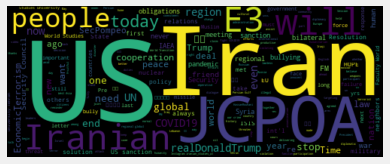

In [54]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 200, random_state = 21, 
                      max_font_size =150).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

# Analysis I: Topic Modeling 
## TFIDF
Implement Term Frequency-Inverse Document Frequency for Topic Modeling and Clustering.
TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# awesome_stopwords = set(['&amp;', '\n', '\n\n', 'to', 'I'])

In [21]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [22]:
results = tfidf_vectorizer.fit_transform(df['tweets_fixed'])

In [23]:

results

<200x2548 sparse matrix of type '<class 'numpy.float64'>'
	with 4311 stored elements in Compressed Sparse Row format>

In [86]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
# Import NNMF and LDA
    #Define Function: PRINT_TOP_WORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation
n_samples = 2000
n_features = 1000
n_components = 2548
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [87]:
lda = LatentDirichletAllocation()

In [91]:
lda.fit(results)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [90]:
model_df = pd.DataFrame(lda.components_, columns=tfidf_vectorizer.get_feature_names())

ValueError: ignored

In [46]:
for number in range(model_df.shape[0]):
  print(model_df.iloc[number].idxmax())

NameError: ignored

In [85]:
df['tweets_fixed'][df['tweets_fixed'].str.contains('amp')]

0      Thanks to @SecPompeo, we now know criteria for...
19     75 years ago today, the US gained the infamy o...
24     Reiterated Iran's strong and steadfast solidar...
33     The west must cease financing and harboring te...
43     Today is 5th anniv. of the JCPOA—last decade’s...
                             ...                        
193    To my EU/E3 Colleagues \n1."Fully upheld commi...
195    Our response to US EconomicTerrorism &amp; bla...
196    Subjecting construction workers to EconomicTer...
197    Returned from Geneva where I met with Russian ...
199    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
Name: tweets_fixed, Length: 68, dtype: object

In [86]:
df['tweets_fixed'].iloc[0]

"Thanks to @SecPompeo, we now know criteria for a country to be removed from—or included in—State Dept's terror list: \n\nRelations with Israel.\n\nWorld's No.1 nuclear threat, rights violator, illegal occupier &amp; terror entity\n\nHow can the world STILL take US foreign policy seriously? "


# PAUSE 

## Analysis II: Topic Modeling with NNMF

In [47]:
# Use tf-idf features for NMF. #n_features = 1000
#n_components int or None
        #Number of components, if n_components is not set all features are kept.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features= 10,
                                   stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(df['tweets_fixed'])
tfidf


Extracting tf-idf features for NMF...


<200x10 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [48]:
# Fit the NMF model n_samples =10

n_samples =10
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf) #not results, but transformed df['tweets_fixed']from preceding cell

nmf

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=10 and n_features=1000...


NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
    n_components=2548, random_state=1, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [50]:
tfidf

<200x10 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [49]:
#Cool results
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names


Topics in NMF model (Frobenius norm):


['covid19',
 'e3',
 'global',
 'iran',
 'jcpoa',
 'people',
 'realdonaldtrump',
 'security',
 'today',
 'world']

In [51]:
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #1: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #2: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #3: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #4: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #5: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #6: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #7: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #8: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #9: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #10: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #11: world today security realdonaldtrump people jcpoa iran global e3 covid19
To

In [52]:
# Fit the NNMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))

nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
nmf

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=10 and n_features=1000...


NMF(alpha=0.1, beta_loss='kullback-leibler', init=None, l1_ratio=0.5,
    max_iter=1000, n_components=2548, random_state=1, shuffle=False,
    solver='mu', tol=0.0001, verbose=0)

In [53]:
#Different topics obtained from Kullback-Leibler Divergence
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
#tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #1: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #2: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #3: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #4: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #5: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #6: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #7: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #8: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #9: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #10: world today security realdonaldtrump people jcpoa iran global e3 covid19
Topic #11: world today

# Analysis: Latent Semantic Analysis (LSA)

In [67]:
len(tfidf_vectorizer.get_feature_names())

2709

In [19]:
# We are going to create a document-term matrix using CountVectorizer
#Transform 'tweets_fixed' into vectors   and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

#data_cv = cv.fit_transform(data_clean.transcript)
df_cv = cv.fit_transform(df.tweets_fixed)

#data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())

#data_dtm.index = data_clean.index
df_dtm.index = df.index

#data_dtm
df_dtm

,000,10,1000s,104,11,12,1230,13,15,16,1600,17,18,19,1906,1947,1979,1982,19th,1st,20,2016,2017,2018,2019,2020,21,2231,24,24th,25,27,280,2nd,30,36,3rd,40,41st,4th,...,也更成功,也祝中国朋友们新年快乐,伊朗人说,伊朗始终与中国人民站在一起,伊朗都坚定与中国站在一起,借此机会,兄弟犹如手足亲,共同反对单边主义,加强在国际事务中相互支持等议题达成共识,反对削弱伊核协议,在2020年,在中国端午节来临前夕,在同我的好朋友,在抗击新型冠状病毒感染肺炎疫情过程中,多边主义及国际法的支持,岂曰无衣,希望全体中国人民度过一个健康祥和的春节,很高兴同中国国务委员兼外长王毅举行视频会晤,我们就共同抗击新冠肺炎疫情,我们就深化两国全面战略伙伴关系,我们谴责美国趁人之危的做法,我们都重申对伊核协议,我对中国抗击疫情的成功举措表示赞赏和感谢,我对中方向伊朗提供抗疫物资并派医疗专家表示感谢,我希望推动伊中全面战略伙伴关系持续稳步发展,我很高兴在北京和中国朋友们共同度过了2019年的最后一天,推动25年双边合作计划,无论何时何地,无论顺境逆境,更阻止疫情向国际蔓延,比起2009年美国对h1n1流感的防控,祝福中国人民鼠年安康,要特别祝中国朋友们端午安康,让人们对中国打赢疫情防控战充满信心,谴责美国持续非法制裁严重妨碍伊朗抗击疫情努力,造物之初本一体,阿丹子孙皆兄弟,阿富汗和平进程等共同关心的问题交换了意见,非常高兴再次和我的老朋友,鼠年吉祥
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#TRANSPOSE # Read in the document-term matrix and Transpose
df_dtmtransposed = df_dtm.transpose()
df_dtmtransposed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [22]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
df.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [23]:
# Find the top 30 words said in each tweet
#df_dtm_tr is the df of transposed vectorized tweets
top_dict = {}
for c in df_dtmtransposed.columns:
    top = df_dtmtransposed[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('terror', 2),
  ('world', 2),
  ('thanks', 1),
  ('removed', 1),
  ('nuclear', 1),
  ('seriously', 1),
  ('included', 1),
  ('rights', 1),
  ('foreign', 1),
  ('state', 1),
  ('dept', 1),
  ('amp', 1),
  ('secpompeo', 1),
  ('threat', 1),
  ('know', 1),
  ('country', 1),
  ('list', 1),
  ('israel', 1),
  ('entity', 1),
  ('violator', 1),
  ('criteria', 1),
  ('illegal', 1),
  ('relations', 1),
  ('policy', 1),
  ('occupier', 1),
  ('heighten', 0),
  ('held', 0),
  ('hegemony', 0),
  ('heart', 0),
  ('hell', 0)],
 1: [('council', 1),
  ('today', 1),
  ('attempt', 1),
  ('null', 1),
  ('refuted', 1),
  ('leaves', 1),
  ('bullying', 1),
  ('notification', 1),
  ('bullies', 1),
  ('members', 1),
  ('realdonaldtrump', 1),
  ('time', 1),
  ('stop', 1),
  ('lawless', 1),
  ('novice', 1),
  ('secpompeo', 1),
  ('unlawful', 1),
  ('sec', 1),
  ('debate', 1),
  ('void', 1),
  ('prevented', 1),
  ('listening', 1),
  ('isolated', 1),
  ('meeting', 1),
  ('friday', 1),
  ('heighten', 0),
  ('

In [24]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for text in df_dtmtransposed.columns:
    top = [word for (word, count) in top_dict[text]]
    for t in top:
        words.append(t)
        
words

['terror',
 'world',
 'thanks',
 'removed',
 'nuclear',
 'seriously',
 'included',
 'rights',
 'foreign',
 'state',
 'dept',
 'amp',
 'secpompeo',
 'threat',
 'know',
 'country',
 'list',
 'israel',
 'entity',
 'violator',
 'criteria',
 'illegal',
 'relations',
 'policy',
 'occupier',
 'heighten',
 'held',
 'hegemony',
 'heart',
 'hell',
 'council',
 'today',
 'attempt',
 'null',
 'refuted',
 'leaves',
 'bullying',
 'notification',
 'bullies',
 'members',
 'realdonaldtrump',
 'time',
 'stop',
 'lawless',
 'novice',
 'secpompeo',
 'unlawful',
 'sec',
 'debate',
 'void',
 'prevented',
 'listening',
 'isolated',
 'meeting',
 'friday',
 'heighten',
 'headlines',
 'hegemony',
 'healthy',
 'hear',
 'iaea',
 'iran',
 'total',
 'rafaelmgrossi',
 'closed',
 'productive',
 'percent',
 'fully',
 'normal',
 'matters',
 'pressure',
 'comparable',
 'mtg',
 'relations',
 'transparent',
 'transparency',
 '92',
 'intent',
 'global',
 'inspections',
 'torpedo',
 'want',
 'carried',
 'reopen',
 'heart',


Note:
These could be words to add to 'Stop Words' List, but let's pause on inserting since "significant" words like {harrasses, hate, healthy, and Hassan} are included

In [25]:
# If more than half of the tweets (101) have it as a top word, 
#perhaps exclude it from the list in next topic modeling exercise
add_stop_words = [word for word, count in Counter(words).most_common() if count > 100 ]
add_stop_words

['held', 'help']

In [27]:

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
df_clean = pd.read_pickle('data_clean.pkl') 

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_clean.columns)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_clean.index

# Pickle it for later use
#import pickle
#pickle.dump(cv, open("cv_stop.pkl", "wb"))
#data_stop.to_pickle("dtm_stop.pkl")

ValueError: ignored

In [28]:
df_dtmtransposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
造物之初本一体,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
阿丹子孙皆兄弟,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
阿富汗和平进程等共同关心的问题交换了意见,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
非常高兴再次和我的老朋友,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_dtmtransposed.columns

RangeIndex(start=0, stop=200, step=1)

## Exploratory Data Analysis: Word Cloud
###  Figures 1: Wordclouds¶

<function matplotlib.pyplot.show>

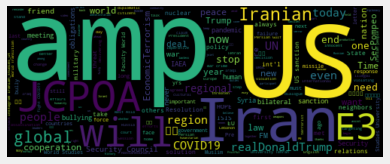

In [30]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 200, random_state = 21, 
                      max_font_size =150).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

In [31]:
# Find the top 30 words said by each tweet
top_dict = {}
for c in df.columns:
    top = df[c].sort_values(ascending=False).tail(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Tweets': [(140,
   "Appeasement confirmed.\n\nE3 sold out remnants of JCPOA to avoid new Trump tariffs.\n\nIt won't work my friends. You only whet his appetite. Remember your high school bully?\n\nIf you want to sell your integrity, go ahead. But DO NOT assume high moral/legal ground.\n\nYOU DON'T HAVE IT. "),
  (104, 'Aparat\nPersian:\n\n\nEnglish:\n'),
  (183,
   'After getting our hostage back this week, fully ready for comprehensive prisoner exchange.\n \nThe ball is in the US’ court.\n\nToday, back to regional diplomacy in Istanbul, at the Ministerial Heart of Asia mtg, joining forces for peace &amp; development in Afghanistan.\n\nNeighborsFirst '),
  (153,
   'A sad day. Preliminary conclusions of internal investigation by Armed Forces: \n\nHuman error at time of crisis caused by US adventurism led to disaster\n\nOur profound regrets, apologies and condolences to our people, to the families of all victims, and to other affected nations.\n💔'),
  (162,
   'A reminder to those hal

## Analysis II: Topic Modeling with LDA

In [79]:
data = pd.read_pickle('dtm_stop.pkl')
data

FileNotFoundError: ignored

In [75]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

In [76]:
# One of the required inputs is a term-document matrix
tdm = df.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
Tweets,.@SecPompeo ‘s lawless bullying leaves US isol...,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Outlaw @SecPompeo has no qualms about violatin...,My fifth and concluding online discussion of t...,In their own words:,Factsheet on the illegitimate and felonious U....,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,"67 years ago today, US/UK tried to suffocate t...",I'll be delivering the fourth of five online t...,.@AmbJohnBolton has repeated today what he sai...,"""Pirates of the Caribbean"" have their own judg...",RT @TakhtRavanchi: The result of the vote in U...,In Beirut today to express the solidarity of t...,US is so desperate to show support for its str...,I just published Using Security Council to Des...,I just published The World in Transition,"The first three (of five) talks on ""The World ...",I'll be delivering the third of five online ta...,"75 years ago today, the US gained the infamy o...",@iabbasian ممنون از لطف شما و تذکرتان.,@iabbasian سلام دوست عزیزم. من خودم به عربی و ...,عندما يريد الناطقون بالفارسية تقديم التعازي لل...,When Persian speakers want to express their co...,Reiterated Iran's strong and steadfast solidar...,Our thoughts and prayers are with the great an...,قلوبُنا مع الشعب اللبناني في هذه الكارثة الكبر...,Thread ⬇︎,"Today, Iranians mark their seismic achievement...",You can watch my presentation @\n,I'll be delivering the second of five online t...,"Just had a very substantive, frank and friendl...",Very productive meeting with Chairman of the I...,The west must cease financing and harboring te...,"As we mark EidAlAdha (Feast of the Sacrifice),...",يحلّ علينا الأضحى المبارك و نحن في استضافته ال...,"In the age of 280-character diplomacy, it is i...",My talk will begin at 1230 GMT. 1230.,I'll be delivering the first of five online ta...,U.S. illegally occupies territory of another S...,"In Moscow, \n\n- Delivered important msg to Pr...",...,As 5th &amp; final REMEDIAL step under paragra...,A reminder to those hallucinating about emulat...,@realDonaldTrump Those masquerading as diploma...,-Having committed grave breaches of int'l law ...,"24 hrs ago, an arrogant clown— masquerading as...","The US' act of international terrorism, target...","On my final trip of this decade, consensus amo...",Delighted to welcome 2020 with our Chinese fri...,我很高兴在北京和中国朋友们共同度过了2019年的最后一天，也将在北京迎来2020年的第一天。...,Fruitful talks with FM Lavrov in Russia. \n\nU...,Iran has long stated its readiness to work w/o...,"Wishing my Christian compatriots, and all acro...",و کما جرت العادة، قمت أمس واليوم بزيارة مسقط ل...,The US' approach to sanctions betrays a pathol...,A pleasure to co-chair 19th Joint Commission M...,Wrapping up a presidential visit to Tokyo—with...,"Substantive, friendly and frank summit between...",Excellent bilateral &amp; multilateral meeting...,Good to be in Kuala Lumpur with Pres. @HassanR...,Taking unprecedented step of punishing those w...,,Realpolitik has failed miserably in providing ...,"After getting our hostage back this week, full...",Going home,Glad that Professor Massoud Soleimani and Mr. ...,"Israel today tested a nuke-missile, aimed at I...",Brian Hook has given our E3 JCPOA partners a t...,"Detailed, legal rebuttal of the E3 letter to t...",ایران لا تری جدوی فی استمرار الحرب و الحصار ع...,Latest E3 letter to UNSG on missiles is a desp...,@SecPompeo once again admits that US EconomicT...,Instead of arrogant threats or hollow paper pr...,"To my EU/E3 Colleagues \n1.""Fully upheld commi...","Pleased to be in Turkey, attending 24th minist...",Our response to US EconomicTerrorism &amp; bla...,Subjecting construction workers to EconomicTer...,Returned from Geneva where I met with Russian ...,"Contrary to its deceptive cl

In [77]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

TypeError: ignored

In [78]:

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())


FileNotFoundError: ignored

## Note:
Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - e number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [102]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
from sklearn.decomposition import LatentDirichletAllocation


lda = models.LdaModel(corpus=corpus.pkl), id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

SyntaxError: ignored

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

## Analysis II: Semantic Analysis With LSA Model
Apply LSA Model to Training Set
We are applying the Latent Semantic Analysis, instead of the Vector Space Model, to conduct a tweet similarity analysis because our body of 200 tweets is long. Also, LSA recognizes the occurence of synonyms rather than counting them as different from each other. In addition to context, LSA considers how a word can be used for slightly different meanings. The goal is to identify clusters of terms that reflect topics appearing in Zarif's tweets.

**Note: LSA is the process of applying feature dimension reduction to a tf-idf term-document matrix. Since we don't want to mean-center our variables, which means we lose sparsity, we will use another dimension reduction method aside from Pincipal Compenent Analysis. This is called Singular Value Decomposition (SVD).

Dimension reduction: Singular Value Decomposition (SVD)
We have our vectors, with one vector per tweet. Will use a dimension reduction technique called Singular Value Decomposition (SVD) function from sklearn rather than PCA because we don't want to mean-center our variables (and thus lose sparsity).



In [42]:
# Need vectors for LSA and LDA topic modeling. 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#X_train, X_test = train_test_split(df['tweets_fixed'], test_size=0.4, random_state=0)
X_train, X_test = train_test_split(df_dtmtransposed.columns, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [44]:
X_train

Int64Index([187,  46, 138, 195, 108,  62,   2,  59, 136, 197,
            ...
             87,  36,  21,   9, 103,  67, 192, 117,  47, 172],
           dtype='int64', length=120)

In [45]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 704 features to 130. 
 ## We subsitute 'svd' as our pca for dimension reduction.
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
#X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_train_lsa = lsa.fit_transform(X_train)

print(X_train_lsa.shape)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets (paragraphs) our solution considers similar, 
#for the first five identified topics
#paras_by_component = pd.DataFrame(X_train_lsa,index=X_train)
tweets_by_component = pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    #print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
    #print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])


ValueError: ignored

## Measuring Javed Zarif's Polarity & Subjectivity


In [22]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['tweets_fixed'].apply(get_subjectivity)
df['polarity'] = df['tweets_fixed'].apply(get_polarity)

#Show the new dataframe
df


,Tweets,tweets_fixed,subjectivity,polarity
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364
2,In their own words:,In their own words:,1.000000,0.600000
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000
...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000


In [23]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
2,In their own words:,In their own words:,1.000000,0.600000,Positive
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000,Positive
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative


In [24]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1Outlaw @SecPompeo has no qualms about violating his own country's laws.

Standing next to World's 1 nuclear threat, he declares his desire to flood our region with even more US weapons—all while trying to impede lawful normalization of Iran's defense 
cooperation with the world. 

2My fifth and concluding online discussion of the World in Transition.

Today, Aug 24, From 12:30 to 13:15 UTC;

Topic: Iran and the World in Transition;

Faculty of World Studies, University of Tehran.

Live Instagram @iranian_studies_ut 

3In their own words: 

4I'll be delivering the fourth of five online talks at Faculty of World Studies, University of Tehran, today, Aug 17, 12:30-13:15 UTC

Topic: End of Hegemony

Live Instagram @iranian_studies_ut 

5.@AmbJohnBolton has repeated today what he said on May 8, 2018, while National Security Advisor in the Trump administration.

At least he is consistent—a trait notably absent in this US administration.

US recourse to Dispute Resolution Mechanism in 2231 h

In [25]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

2)"Pirates of the Caribbean" have their own judges and courts now.

Sadly for them, stolen booty wasn't Iran's. Fuel was sold F.O.B. Persian Gulf. Ship and flag weren't ours either.

Hollow, cheap propaganda doesn’t deflect from miserable failure of US diplomatic malpractice at UN.

3)US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: 

4)I just published Using Security Council to Destroy Security Council 

5)75 years ago today, the US gained the infamy of becoming the 1st and ONLY 

## Sentiment Analysis: Visualize Tweets by Minister Zarif
### Figure 2: Sentiment Analysis Regarding Subjectivity

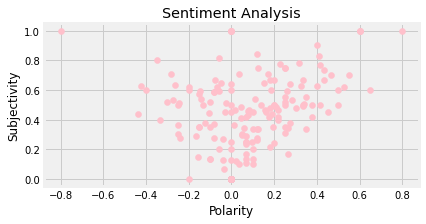

In [26]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

In [27]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

0      Outlaw @SecPompeo has no qualms about violatin...
1      My fifth and concluding online discussion of t...
2                                   In their own words: 
6      I'll be delivering the fourth of five online t...
7      .@AmbJohnBolton has repeated today what he sai...
                             ...                        
190    To my EU/E3 Colleagues \n1."Fully upheld commi...
191    Pleased to be in Turkey, attending 24th minist...
192    Our response to US EconomicTerrorism &amp; bla...
195    Contrary to its deceptive claims, new US regul...
196    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
Name: Tweets, Length: 97, dtype: object


In [28]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

48.5

In [29]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

5      67 years ago today, US/UK tried to suffocate t...
8      "Pirates of the Caribbean" have their own judg...
11     US is so desperate to show support for its str...
12     I just published Using Security Council to Des...
16     75 years ago today, the US gained the infamy o...
31     As we mark EidAlAdha (Feast of the Sacrifice),...
39     Productive talks in Baghdad with PM @MAKadhimi...
41     25 yrs ago today, SrebrenicaGenocide began as ...
43     Don't believe the hype: Iran triggered JCPOA D...
47     The US isn't merely violating JCPOA and bullyi...
49     .@SecPompeo is so desperate to mislead the wor...
50     E3 must stop public face-saving &amp; muster t...
52     Iran &amp; Russia are "determined to deal with...
54     Productive talks with my friend @MevlutCavusog...
55     International Criminal COURT now blackmailed b...
57     US has tried to heighten tension w/ Iran &amp;...
58     We achieved humanitarian swap *despite* your s...
62     Some don't think BlackLi

In [30]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

23.5

### Figure 3: Sentiment Analysis - Polarity

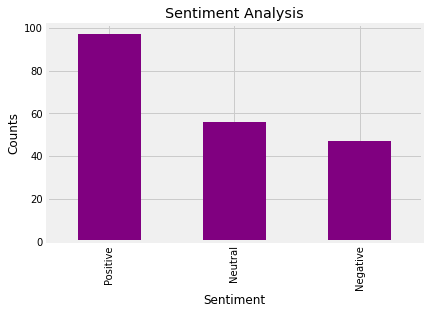

In [31]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = 'Purple')
plt.show()

In [32]:
#What did I wrong: not seeing new columns "id", 'retweets'
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in zarif_tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in zarif_tweets])
        df['len'] = np.array([len(tweet.text) for tweet in zarif_tweets])
        df['date'] = np.array([tweet.created_at for tweet in zarif_tweets])
        df['source'] = np.array([tweet.source for tweet in zarif_tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in zarif_tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in zarif_tweets])
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
2,In their own words:,In their own words:,1.000000,0.600000,Positive
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000,Positive
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative


In [33]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
1,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
2,In their own words:,In their own words:,1.000000,0.600000,Positive
3,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
4,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
...,...,...,...,...,...
195,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive
196,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,Met with Yemen’s Mohammad Abdul-Salam in Tehra...,0.750000,0.125000,Positive
197,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
198,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative


In [34]:
from sklearn.model_selection import train_test_split
# Need vectors for LSA  modeling. 
#Substitute 'emma_pars' with our text of fixed tweets: 'tweets_fixed'
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(df['tweets_fixed'], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


In [35]:
#Applying the vectorizer
tweets_fixed_tfidf = vectorizer.fit_transform(df['tweets_fixed'])
print("Number of features: %d" % tweets_fixed_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(tweets_fixed_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_by_tweet = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_tweet[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[1])
print('Tf_idf vector:', tfidf_by_tweet[1])

Number of features: 696
Original sentence: My fifth and concluding online discussion of the World in Transition.

Today, Aug 24, From 12:30 to 13:15 UTC;

Topic: Iran and the World in Transition;

Faculty of World Studies, University of Tehran.

Live Instagram @iranian_studies_ut 
Tf_idf vector: {'res': 0.24829312999774658, 'address': 0.26282014423361305, 'return': 0.24829312999774658, 'respect': 0.26282014423361305, 'face': 0.24829312999774658, 'general': 0.24829312999774658, 'rule': 0.22781845339577755, 'law': 0.38563352511588395, 'int': 0.22003434261948152, 'community': 0.23702510234848578, 'important': 0.22003434261948152, 'english': 0.22781845339577755, 'council': 0.20202341151065023, 'unsc': 0.22781845339577755, 'persian': 0.20202341151065023, '2231': 0.21329143915991103, 'security': 0.17522840099283243}


In [36]:
tweets_fixed_tfidf.shape

(200, 696)

#### We have 696 features in our term frequency inverse document frequency matrix.

In [37]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
#data_cv = cv.fit_transform(data_clean.transcript)
df_cv = cv.fit_transform(df.tweets_fixed)

#data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())

#data_dtm.index = data_clean.index
df_dtm.index = df.tweets_fixed.index

#data_dtm
df_dtm

,000,10,1000s,104,11,12,1230,13,15,16,1600,17,18,19,1906,1947,1979,1982,19th,1st,20,2016,2017,2018,2019,2020,21,2231,24,24th,25,2500,27,280,2nd,30,36,3rd,40,41st,...,也更成功,也祝中国朋友们新年快乐,伊朗人说,伊朗始终与中国人民站在一起,伊朗都坚定与中国站在一起,借此机会,兄弟犹如手足亲,共同反对单边主义,加强在国际事务中相互支持等议题达成共识,反对削弱伊核协议,在2020年,在中国端午节来临前夕,在同我的好朋友,在抗击新型冠状病毒感染肺炎疫情过程中,多边主义及国际法的支持,岂曰无衣,希望全体中国人民度过一个健康祥和的春节,很高兴同中国国务委员兼外长王毅举行视频会晤,我们就共同抗击新冠肺炎疫情,我们就深化两国全面战略伙伴关系,我们谴责美国趁人之危的做法,我们都重申对伊核协议,我对中国抗击疫情的成功举措表示赞赏和感谢,我对中方向伊朗提供抗疫物资并派医疗专家表示感谢,我希望推动伊中全面战略伙伴关系持续稳步发展,我很高兴在北京和中国朋友们共同度过了2019年的最后一天,推动25年双边合作计划,无论何时何地,无论顺境逆境,更阻止疫情向国际蔓延,比起2009年美国对h1n1流感的防控,祝福中国人民鼠年安康,要特别祝中国朋友们端午安康,让人们对中国打赢疫情防控战充满信心,谴责美国持续非法制裁严重妨碍伊朗抗击疫情努力,造物之初本一体,阿丹子孙皆兄弟,阿富汗和平进程等共同关心的问题交换了意见,非常高兴再次和我的老朋友,鼠年吉祥
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 704 features to 130. 
 ## We subsitute 'svd' as our pca for dimension reduction.
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

print(X_train_lsa.shape)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets (paragraphs) our solution considers similar, 
#for the first five identified topics
#paras_by_component = pd.DataFrame(X_train_lsa,index=X_train)
tweets_by_component = pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))

(120, 120)
Percent variance captured by all components: 100.00000000000003
Component 0:
Component 1:
Component 2:
Component 3:
Component 4:


In [39]:
print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])

tweets_fixed
Have you EVER seen such a sea of humanity in your life, @realdonaldtrump?\n\nDo you still want to listen to the clowns advising you on our region?\n\nAnd do you still imagine you can break the will of this great nation &amp; its people?\n\nEnd of malign US presence in West Asia has begun.          0.411270
24 hrs ago, an arrogant clown— masquerading as a diplomat— claimed people were dancing in the cities of Iraq.\n\nToday, hundreds of thousands of our proud Iraqi brothers and sisters offered him their response across their soil.\n\nEnd of US malign presence in West Asia has begun.                   0.404452
What the US has accomplished in its terrorist assassination of anti-ISIS heroes is to unleash global anti-US fury and a worldwide rancor—on a scale not seen in recent memory.\n\nEnd of malign U.S. presence in West Asia has begun.                                                                      0.378944
-Having committed grave breaches of int'l law in Friday's cowar

### Sentence similarity
We can also look at how similar various tweets are to one another. For example, here are the similarity scores (as a heatmap) of the first 10 tweets in the training set:

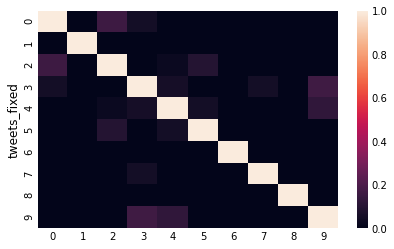

Key:
0 Latest E3 letter to UNSG on missiles is a desperate falsehood to cover up their miserable incompetence in fulfilling bare minimum of their own JCPOA obligations

If E3 want a modicum of global credibility, they can begin by exerting sovereignty rather than bowing to US bullying. 
1 The int'l community in general—and UN Security Council in particular—face an important decision: Do we maintain respect for rule of law, or do we return to law of the jungle? 

My address before UNSC on Res. 2231 

Persian: 
English:  
2 E3 think they’re living in the 19th Century, when they dictated to countries, lied, &amp; got away with it.

-IRAN triggered the DRM

-IRAN is NOT the one emptying the accord of its substance—the E3 is

Forget about compensating for U.S: fulfill your own obligations. 

EVEN JUST ONE. 
3 Contrary to its deceptive claims, new US regulations will aggravate EconomicTerrorism on ordinary Iranians. @SecPompeo voiced his delusion that Iranian people must bow to US "if they w

In [40]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

### Apply LSA to Test Set

In [41]:
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

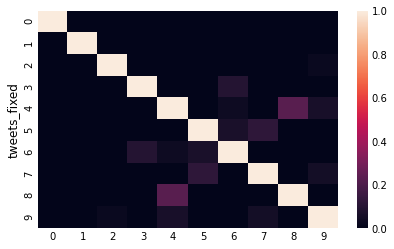

Key:
0 @iabbasian سلام دوست عزیزم. من خودم به عربی و انگلیسی امتحان کردم. برای لبنان، ایران، عراق، پاکستان و آلمان. برای همه همین مشکل بود. ولی برای اسراییل و آمریکا نبود.  از چند نفر از دوستان هم درخواست کردم در خارج از ایران امتحان کنند. آنها هم به همین مشکل برخوردند.
1 و کما جرت العادة، قمت أمس واليوم بزيارة مسقط للتباحث والتشاور مع كبار المسؤولين في سلطنة عمان بخصوص العلاقات الثنائية والقضايا الإقليمية والدولية.
 كانت ولاتزال ايران وعمان دولتين جارتين تربطهما علاقات حميمة جدا. 

سنبقى دائما الى جانب سلطنة عمان.
دولة_راسخة_شعب_قوي 
2 IMF's @KGeorgieva has stated that countries affected by COVID19 will be supported via Rapid Financial Instrument. Our Central Bank requested access to this facility immediately. 

IMF/IMF Board should adhere to Fund's mandate, stand on right side of history &amp; act responsibly.
3 Important message of President @HassanRouhani to American people:


4 Taking unprecedented step of punishing those who seek to COMPLY with UN Security Council isn't enough fo

In [42]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index = X_test).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels = range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# We are going to create a document-term matrix using CountVectorizer
#Transform 'tweets_fixed' into vectors   and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

#data_cv = cv.fit_transform(data_clean.transcript)
df_cv = cv.fit_transform(df.tweets_fixed)

#data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())

#data_dtm.index = data_clean.index
df_dtm.index = df.index

#data_dtm
df_dtm

,000,10,1000s,104,11,12,1230,13,15,16,1600,17,18,19,1906,1947,1979,1982,19th,1st,20,2016,2017,2018,2019,2020,21,2231,24,24th,25,2500,27,280,2nd,30,36,3rd,40,41st,...,也更成功,也祝中国朋友们新年快乐,伊朗人说,伊朗始终与中国人民站在一起,伊朗都坚定与中国站在一起,借此机会,兄弟犹如手足亲,共同反对单边主义,加强在国际事务中相互支持等议题达成共识,反对削弱伊核协议,在2020年,在中国端午节来临前夕,在同我的好朋友,在抗击新型冠状病毒感染肺炎疫情过程中,多边主义及国际法的支持,岂曰无衣,希望全体中国人民度过一个健康祥和的春节,很高兴同中国国务委员兼外长王毅举行视频会晤,我们就共同抗击新冠肺炎疫情,我们就深化两国全面战略伙伴关系,我们谴责美国趁人之危的做法,我们都重申对伊核协议,我对中国抗击疫情的成功举措表示赞赏和感谢,我对中方向伊朗提供抗疫物资并派医疗专家表示感谢,我希望推动伊中全面战略伙伴关系持续稳步发展,我很高兴在北京和中国朋友们共同度过了2019年的最后一天,推动25年双边合作计划,无论何时何地,无论顺境逆境,更阻止疫情向国际蔓延,比起2009年美国对h1n1流感的防控,祝福中国人民鼠年安康,要特别祝中国朋友们端午安康,让人们对中国打赢疫情防控战充满信心,谴责美国持续非法制裁严重妨碍伊朗抗击疫情努力,造物之初本一体,阿丹子孙皆兄弟,阿富汗和平进程等共同关心的问题交换了意见,非常高兴再次和我的老朋友,鼠年吉祥
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
#TRANSPOSE # Read in the document-term matrix and Transpose
df_dtmtransposed = df_dtm.transpose()
df_dtmtransposed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Change persian to english
 Reza Roshani Tabrizi11:42 AM
isEnglish('zariiiifffff') == True

In [46]:
# Find the top 30 words said in each tweet
#df_dtm_tr is the df of transposed vectorized tweets
top_dict = {}
for c in df_dtmtransposed.columns:
    top = df_dtmtransposed[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('world', 2),
  ('impede', 1),
  ('nuclear', 1),
  ('threat', 1),
  ('qualms', 1),
  ('outlaw', 1),
  ('country', 1),
  ('standing', 1),
  ('defense', 1),
  ('normalization', 1),
  ('cooperation', 1),
  ('region', 1),
  ('desire', 1),
  ('trying', 1),
  ('flood', 1),
  ('iran', 1),
  ('laws', 1),
  ('violating', 1),
  ('weapons', 1),
  ('declares', 1),
  ('lawful', 1),
  ('secpompeo', 1),
  ('havens', 0),
  ('鼠年吉祥', 0),
  ('haunt', 0),
  ('hates', 0),
  ('hate', 0),
  ('hassanrouhani', 0),
  ('hasn', 0),
  ('harboring', 0)],
 1: [('world', 3),
  ('transition', 2),
  ('live', 1),
  ('iran', 1),
  ('30', 1),
  ('aug', 1),
  ('24', 1),
  ('faculty', 1),
  ('utc', 1),
  ('instagram', 1),
  ('concluding', 1),
  ('discussion', 1),
  ('fifth', 1),
  ('studies', 1),
  ('12', 1),
  ('tehran', 1),
  ('topic', 1),
  ('university', 1),
  ('15', 1),
  ('13', 1),
  ('today', 1),
  ('iranian_studies_ut', 1),
  ('online', 1),
  ('headline', 0),
  ('hate', 0),
  ('headlines', 0),
  ('hatred', 0),


In [47]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for text in df_dtmtransposed.columns:
    top = [word for (word, count) in top_dict[text]]
    for t in top:
        words.append(t)
        
words

['world',
 'impede',
 'nuclear',
 'threat',
 'qualms',
 'outlaw',
 'country',
 'standing',
 'defense',
 'normalization',
 'cooperation',
 'region',
 'desire',
 'trying',
 'flood',
 'iran',
 'laws',
 'violating',
 'weapons',
 'declares',
 'lawful',
 'secpompeo',
 'havens',
 '鼠年吉祥',
 'haunt',
 'hates',
 'hate',
 'hassanrouhani',
 'hasn',
 'harboring',
 'world',
 'transition',
 'live',
 'iran',
 '30',
 'aug',
 '24',
 'faculty',
 'utc',
 'instagram',
 'concluding',
 'discussion',
 'fifth',
 'studies',
 '12',
 'tehran',
 'topic',
 'university',
 '15',
 '13',
 'today',
 'iranian_studies_ut',
 'online',
 'headline',
 'hate',
 'headlines',
 'hatred',
 'heading',
 'having',
 'havens',
 'words',
 '鼠年吉祥',
 'havens',
 'heart',
 'hear',
 'healthy',
 'headlines',
 'headline',
 'heading',
 'having',
 'haunt',
 'honoring',
 'hatred',
 'hates',
 'hate',
 'hassanrouhani',
 'hasn',
 'harboring',
 'harasses',
 'hegemony',
 'heighten',
 'held',
 'history',
 'honor',
 'honest',
 'home',
 'hollow',
 'holiday

In [48]:
# Let's aggregate this list and identify the most common words along with how many times they occur 
Counter(words).most_common()

[('having', 103),
 ('havens', 102),
 ('heading', 101),
 ('hatred', 97),
 ('haunt', 96),
 ('headline', 94),
 ('headlines', 84),
 ('healthy', 83),
 ('hear', 77),
 ('hates', 73),
 ('iran', 68),
 ('amp', 66),
 ('heart', 61),
 ('hate', 60),
 ('hassanrouhani', 51),
 ('hegemony', 48),
 ('heighten', 44),
 ('held', 38),
 ('鼠年吉祥', 37),
 ('hasn', 37),
 ('holiday', 35),
 ('hold', 34),
 ('home', 33),
 ('hollow', 33),
 ('harboring', 26),
 ('jcpoa', 26),
 ('hit', 24),
 ('hell', 24),
 ('honest', 23),
 ('covid19', 22),
 ('world', 21),
 ('today', 21),
 ('harasses', 21),
 ('history', 21),
 ('e3', 18),
 ('people', 17),
 ('global', 17),
 ('realdonaldtrump', 17),
 ('honor', 16),
 ('security', 16),
 ('regional', 15),
 ('historic', 15),
 ('region', 14),
 ('iranian', 14),
 ('end', 14),
 ('help', 14),
 ('economicterrorism', 14),
 ('heritage', 13),
 ('war', 13),
 ('tehran', 12),
 ('sanctions', 12),
 ('happy', 12),
 ('hiroshima75', 12),
 ('cooperation', 11),
 ('talks', 11),
 ('iranians', 11),
 ('law', 11),
 ('sto

In [49]:
# If more than half of the tweets (101) have it as a top word, 
#perhaps exclude it from the list in next topic modeling exercise
add_stop_words = [word for word, count in Counter(words).most_common() if count > 100 ]
add_stop_words

['having', 'havens', 'heading']

In [50]:
df_dtmtransposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000s,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
造物之初本一体,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
阿丹子孙皆兄弟,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
阿富汗和平进程等共同关心的问题交换了意见,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
非常高兴再次和我的老朋友,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#USE df_dtmtransposed.columns

# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
#data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_dtmtransposed.columns)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_dtmtransposed.index
data_stop

AttributeError: ignored

In [52]:
import sklearn.decomposition

In [1]:
df_dtmtransposed

NameError: ignored

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

clf = NMF(init='random',random_state=1)
W1 = clf.fit_transform(vectors_tfidf) #X = vectors_tfidf
H1 = clf.components_


NameError: ignored

In [55]:
# Find the top 30 words said by each tweet
top_dict = {}
for c in df.columns:
    top = df[c].sort_values(ascending=False).tail(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Analysis': [(71, 'Negative'),
  (140, 'Negative'),
  (197, 'Negative'),
  (148, 'Negative'),
  (93, 'Negative'),
  (52, 'Negative'),
  (41, 'Negative'),
  (94, 'Negative'),
  (50, 'Negative'),
  (49, 'Negative'),
  (54, 'Negative'),
  (47, 'Negative'),
  (96, 'Negative'),
  (97, 'Negative'),
  (179, 'Negative'),
  (43, 'Negative'),
  (198, 'Negative'),
  (55, 'Negative'),
  (114, 'Negative'),
  (39, 'Negative'),
  (57, 'Negative'),
  (58, 'Negative'),
  (108, 'Negative'),
  (91, 'Negative'),
  (153, 'Negative'),
  (152, 'Negative'),
  (31, 'Negative'),
  (150, 'Negative'),
  (187, 'Negative'),
  (199, 'Negative')],
 'Tweets': [(137,
   "Appeasement confirmed.\n\nE3 sold out remnants of JCPOA to avoid new Trump tariffs.\n\nIt won't work my friends. You only whet his appetite. Remember your high school bully?\n\nIf you want to sell your integrity, go ahead. But DO NOT assume high moral/legal ground.\n\nYOU DON'T HAVE IT. "),
  (101, 'Aparat\nPersian:\n\n\nEnglish:\n'),
  (180,
   'Afte

## Analysis II: Clustering
### K- Means 

In [29]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X1 = oe.fit_transform(df.df_dtmtransposed)
X1

AttributeError: ignored

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans(n_clusters=20)

kmeans.fit(X1)

NameError: ignored

In [ ]:
k_means = KMeans(n_clusters=20, random_state=123)
k_means.fit(X1)
y_pred = k_means.predict(X1)

## Plot the solution.
#plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
#plt.show()

In [ ]:
# Plot the KMeans solution.
plt.scatter(X1[:,0], X1[:,1], c=y_pred)
plt.show()

### Visualizing Vectors: TSNE Plot¶
Using 'word2vec' allows us to identify similarities between words that never occur near one another in the tweets.

In [ ]:
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='svd', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tweets_by_component) #SVD: substituted dimension reduction for 'pca'

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy =(x[i], y[i]),
                     xytext =(5, 2),
                     textcoords ='offset points',
                     ha ='right',
                     va ='bottom')
    plt.show()

In [ ]:
from gensim.models import Word2Vec

word2vec = Word2Vec(df.tweets_fixed, min_count=2)

In [ ]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

In [ ]:
##Correction
#print(tweets_by_component)

model = word2vec.Word2Vec(vocabulary, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

### DBSCAN Cluster¶

In [ ]:
#new cluster 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(tweets_by_component)

In [ ]:
pca = PCA(n_components=2).fit_transform(tweets_by_component)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             #color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Agglommerative Cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5) #select 5 clusters

# Fit model
clusters = agg_cluster.fit_predict(tweets_by_component)
clusters

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

kmeans = cluster.MiniBatchKMeans(n_clusters=20)

kmeans.fit(X1)

#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

# Analysis III: Topic Modeling Using NNMF